In [93]:
from closure_funcs import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import matplotlib.colors as mcolors
from scipy.stats import linregress, gaussian_kde
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import math
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates  # Import for date formatting

In [94]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'

In [95]:
d = pd.read_csv('../tables/merged_final_non_org_fixed.csv', parse_dates=['Time_Mid'])
#data = d.dropna(subset=['Longitude', 'Latitude', 'k_obs'])
inorg_cols = ['SO4_Ave_IsoK_STP',
 'NO3_Ave_IsoK_STP',
 'NH4_Ave_IsoK_STP',
 'Chl_Ave_IsoK_STP']
d['inorg_tot'] = d.loc[:,inorg_cols].sum(axis=1)

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_17300/236927119.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_17300/236927119.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_17300/236927119.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_17300/236927119.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedL

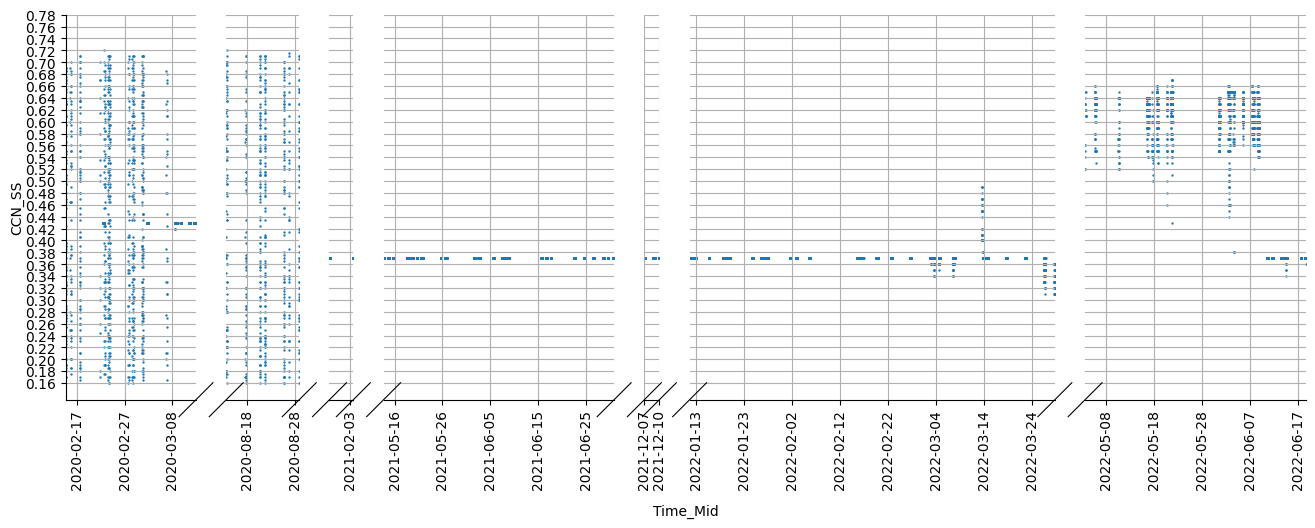

In [96]:
from brokenaxes import brokenaxes
# Assuming 'd' is your DataFrame with 'Time_Mid' and 'CCN_SS' columns
# Convert 'Time_Mid' to datetime if it's not already
d['Time_Mid'] = pd.to_datetime(d['Time_Mid'])

# Calculate the time differences between consecutive points
time_diffs = d['Time_Mid'].diff().dt.days

# Identify where the breaks should occur (where time difference > 10 days)
break_points = np.where(time_diffs > 30)[0]

# Create a list of intervals for the broken x-axis
x_intervals = []
start = 0
for bp in break_points:
    x_intervals.append((d['Time_Mid'].iloc[start], d['Time_Mid'].iloc[bp - 1]))
    start = bp
x_intervals.append((d['Time_Mid'].iloc[start], d['Time_Mid'].iloc[-1]))

fig = plt.figure(figsize=(16, 5))
# Create the brokenaxes plot
bax = brokenaxes(xlims=x_intervals, hspace=.05)

#bax.figure.set_size_inches(12, 6)  # Set figsize here (width, height)

# Plot the data
bax.scatter(d['Time_Mid'], d['CCN_SS'], s=.5)

# Set labels
bax.set_xlabel('Time_Mid', labelpad=75)
bax.set_ylabel('CCN_SS')
# Rotate x-axis labels by 90 degrees
for ax in bax.axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.grid(True)  # Add grid
    ax.set_yticks(np.arange(.16, .8, step=.02))  # Add more y-ticks

    # Set x-axis ticks every 15 days
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))  # Ticks every 15 days
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format dates as YYYY-MM-DD
# Show the plot
plt.savefig('../figures/CCN_SS_time_series.png', dpi=300, bbox_inches='tight')

In [97]:
#d = d[(d['Org_Ave_IsoK_STP']>=0) & (d['SO4_Ave_IsoK_STP']>=0) & (d['NO3_Ave_IsoK_STP']>=0) & (d['NH4_Ave_IsoK_STP']>=0) & (d['Chl_Ave_IsoK_STP']>=0)]

In [98]:
'''
ams_keys = ['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']
for i in range(0,5):
    d.loc[d[ams_keys[i]]<0,ams_keys[i]] = 0
d['ams_tot'] = d.loc[:,['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']].sum(axis=1)
'''

"\nams_keys = ['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']\nfor i in range(0,5):\n    d.loc[d[ams_keys[i]]<0,ams_keys[i]] = 0\nd['ams_tot'] = d.loc[:,['Org_Ave_IsoK_STP', 'SO4_Ave_IsoK_STP', 'NO3_Ave_IsoK_STP', 'NH4_Ave_IsoK_STP', 'Chl_Ave_IsoK_STP']].sum(axis=1)\n"

In [99]:
d['OMF'] = d['Org_Ave_IsoK_STP']/d['ams_tot']

<Figure size 1000x600 with 0 Axes>

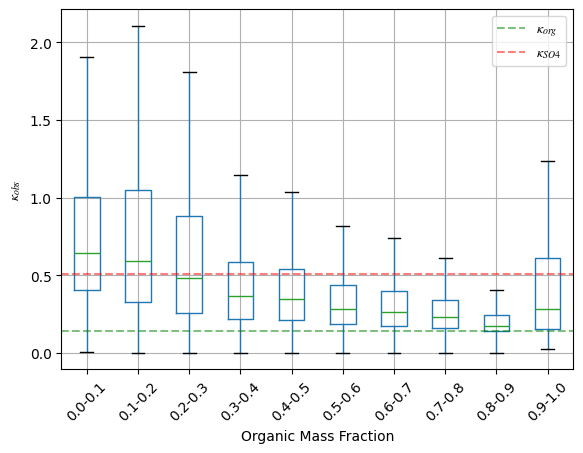

In [100]:
# Assuming 'd' is your DataFrame containing 'CO_ppm' and 'k_obs' columns
# Define CO_ppm ranges (bins) - adjust as needed
#d_sub = sub_m2[sub_m2['CCN_SS']==0.37]
d_sub = d
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
plt.show()
# Bin 'CO_ppm' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Plot boxplot of 'k_obs' for each CO_ppm range
plt.figure(figsize=(10, 6))
d_sub.boxplot(column='k_obs', by='OMF_range', grid=True, showfliers=False)
plt.title('')
plt.axhline(.14, c='green', ls='--', alpha=.5, label=r'$\kappa _{org}$')
plt.axhline(.507, c='red', ls='--', alpha=.5, label=r'$\kappa _{SO4}$')
plt.legend()
plt.suptitle('')  # Removes the automatic boxplot subtitle
plt.xlabel('Organic Mass Fraction')
plt.ylabel(r'$\kappa _{obs}$')
plt.xticks(rotation=45)
#plt.ylim([0, 0.15])
plt.savefig('../figures/k_obs_v_OMF.png', dpi=300, bbox_inches='tight')
plt.show()

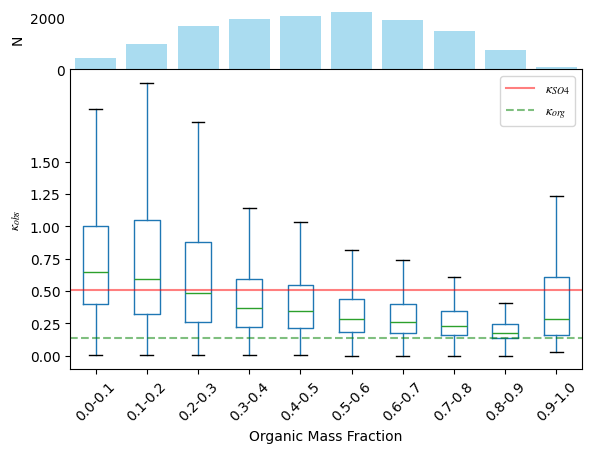

In [101]:
# Define the OMF bins and labels
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
d_sub = d.copy()

# Bin 'OMF' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Create figure and gridspec layout for distribution on top and boxplot below
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]}, sharex=True)

# Count the number of points in each 'OMF_range' bin
counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

# Plot the counts as a bar chart on the top subplot
ax[0].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
ax[0].set_ylabel('N')
ax[0].grid(True, axis='y')

# Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=ax[1])
ax[1].axhline(.507, color='red', linestyle='-', alpha=.5, label=r'$\kappa _{SO4}$')
ax[1].axhline(.14, color='green', linestyle='--', alpha=.5, label=r'$\kappa _{org}$')
ax[1].legend()
ax[1].set_xlabel('Organic Mass Fraction')
ax[1].set_ylabel(r'$\kappa _{obs}$')
ax[1].set_xticklabels(labels, rotation=45)
plt.subplots_adjust(hspace=0)
# Adjust plot and save
plt.suptitle('')  # Remove automatic title
ax[1].set_title('')
ax[1].set_yticks([0,.25,.5,.75,1,1.25,1.5])
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].tick_params(axis='both', which='both', length=0)
#plt.tight_layout()
plt.savefig('../figures/k_obs_v_OMF_with_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

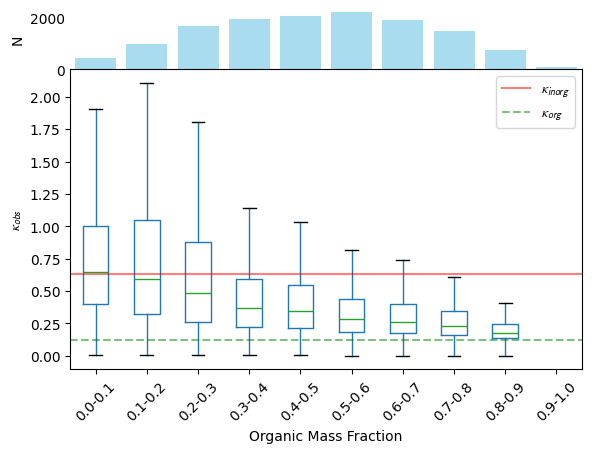

In [102]:
# Define the OMF bins and labels
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
d_sub = d.copy()

# Bin 'OMF' values
d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)

# Create figure and gridspec layout for distribution on top and boxplot below
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 5]}, sharex=True)

# Count the number of points in each 'OMF_range' bin
counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

for l in range(0,len(counts)):
    if counts.iloc[l]< 75:
        d_sub.loc[d_sub['OMF_range']==counts.index[l],'k_obs'] = np.nan

# Plot the counts as a bar chart on the top subplot
ax[0].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
ax[0].set_ylabel('N')
ax[0].grid(True, axis='y')

# Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=ax[1])
ax[1].axhline(.63, color='red', linestyle='-', alpha=.5, label=r'$\kappa _\mathsf{inorg}$')
ax[1].axhline(.12, color='green', linestyle='--', alpha=.5, label=r'$\kappa _\mathsf{org}$')
ax[1].legend()
ax[1].set_xlabel('Organic Mass Fraction')
ax[1].set_ylabel(r'$\kappa _\mathsf{obs}$')
ax[1].set_xticklabels(labels, rotation=45)
plt.subplots_adjust(hspace=0)
# Adjust plot and save
plt.suptitle('')  # Remove automatic title
ax[1].set_title('')
ax[1].set_yticks([0,.25,.5,.75,1,1.25,1.5, 1.75, 2])
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].grid(False)
ax[0].tick_params(axis='both', which='both', length=0)
#plt.tight_layout()
plt.savefig('../figures/k_obs_v_OMF_with_distribution_thresh.png', dpi=300, bbox_inches='tight')
plt.show()

In [103]:
rem_k = ['Takeoff/Landing', 'Transit', 'Descent', 'Ascent', 'Other', 'Slant/Spiral', 'Remote Sensing (HSRL-2)']

In [104]:
for i in range(0,len(rem_k)):
    d.loc[d['leg']==rem_k[i], 'leg'] = np.nan

In [105]:
transit_flights = [pd.Timestamp('2022-03-22').date(), pd.Timestamp('2022-05-18').date(), pd.Timestamp('2022-05-21').date(), pd.Timestamp('2022-05-31').date(), pd.Timestamp('2022-06-18').date()]
df_winter = d[d['Time_Mid'].dt.month.isin([11, 12, 1, 2, 3, 4]) & (~d['Time_Mid'].dt.date.isin(transit_flights))]
df_spring = d[d['Time_Mid'].dt.month.isin([5, 6]) & (np.logical_not((d['Time_Mid'].dt.month.isin([6])) & (d['Time_Mid'].dt.year.isin([2022])))) & (~d['Time_Mid'].dt.date.isin(transit_flights))]
df_summer = d[d['Time_Mid'].dt.month.isin([8, 9]) & (~d['Time_Mid'].dt.date.isin(transit_flights))]
df_bermuda = d[(d['Time_Mid'].dt.month.isin([6])) & (d['Time_Mid'].dt.year.isin([2022])) & (~d['Time_Mid'].dt.date.isin(transit_flights))]

In [106]:
d[d['Time_Mid'].dt.date.isin(transit_flights)]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,SMPS_Bin06,...,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,inorg_tot,OMF,OMF_range
10308,10308,13115,20853,20853,2022-03-22 12:46:57.500,NaN,NaN,NaN,NaN,NaN,...,80.313454,800.099402,1.088,0.002310,0.000777,0.003087,0.248385,1.088,0.748265,0.7-0.8
10309,10309,13116,20854,20854,2022-03-22 12:47:57.500,NaN,NaN,NaN,NaN,NaN,...,75.883582,1025.550434,1.538,0.002106,0.001099,0.003205,0.294812,1.538,0.657232,0.6-0.7
10310,10310,13117,20855,20855,2022-03-22 12:48:57.500,NaN,NaN,NaN,NaN,NaN,...,75.577021,1198.421281,1.699,0.002255,0.001214,0.003469,0.298437,1.699,0.650124,0.6-0.7
10311,10311,13118,20856,20856,2022-03-22 12:49:57.500,NaN,NaN,NaN,NaN,NaN,...,75.834661,1323.628164,2.312,0.003151,0.001651,0.004802,0.295386,2.312,0.656106,0.6-0.7
10312,10312,13119,20857,20857,2022-03-22 12:50:57.500,NaN,NaN,NaN,NaN,NaN,...,77.965394,762.580411,1.739,0.002934,0.001242,0.004176,0.271683,1.739,0.702583,0.7-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13665,13665,16801,26602,26602,2022-06-18 15:11:01.500,0.0,0.0,0.0,0.00,0.0,...,82.422232,2245.787469,1.877,0.004894,0.001341,0.006235,0.229665,1.877,0.784970,0.7-0.8
13666,13666,16802,26603,26603,2022-06-18 15:12:01.500,0.0,0.0,0.0,3172.65,0.0,...,82.052153,1825.623353,1.830,0.004602,0.001307,0.005909,0.232813,1.830,0.778799,0.7-0.8
13667,13667,16803,26604,26604,2022-06-18 15:13:01.500,0.0,0.0,0.0,0.00,0.0,...,81.155777,2089.360219,2.042,0.004706,0.001459,0.006164,0.240674,2.042,0.763384,0.7-0.8
13668,13668,16804,26605,26605,2022-06-18 15:14:01.500,0.0,0.0,0.0,0.00,0.0,...,81.876792,1937.919686,2.026,0.005009,0.001447,0.006456,0.234324,2.026,0.775835,0.7-0.8


In [107]:
df_bermuda[df_bermuda['Time_Mid'].dt.day.isin([18])]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,SMPS_Bin06,...,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,inorg_tot,OMF,OMF_range


In [108]:
d_seg = [df_winter, df_spring, df_summer, df_bermuda]

In [109]:
(df_summer['CCN_n_pred']/df_summer['N_CCN_stdPT']).describe()

count    522.000000
mean       2.132548
std        3.802044
min        0.088822
25%        0.905096
50%        1.034177
75%        1.278476
max       39.578495
dtype: float64

In [110]:
len(d['CCN_SS'].unique())

118

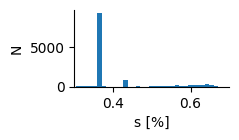

In [111]:
fig, ax = plt.subplots(figsize=(2,1))
d.dropna(subset=['CCN_n_pred','N_CCN_stdPT'])['CCN_SS'].plot.hist(bins=50)
plt.ylabel('N')
plt.xlabel('s [%]')
ax.set_xlim([.3,.7])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('../figures/ss_hist.png', dpi=1000, bbox_inches='tight')

In [112]:
d_calc = d.dropna(subset=['CCN_n_pred','N_CCN_stdPT'])
len(d_calc[d_calc['CCN_SS']==0.37]) / (len(d_calc[d_calc['CCN_SS']==0.37]) + len(d_calc[d_calc['CCN_SS']!=0.37]))

0.6936034600500797

In [113]:
(df_bermuda['CCN_n_pred']/df_bermuda['N_CCN_stdPT']).describe()

count    1885.000000
mean        1.026952
std         0.817337
min         0.153844
25%         0.703494
50%         0.834715
75%         1.050816
max        12.616499
dtype: float64

In [114]:
count = 0
for i in range(0,len(d_seg)):
    count += len(d_seg[i])

In [115]:
df_winter['leg'].unique()

array([nan, 'BCB', 'ACB', 'MinAlt', 'ACT', 'BCT', 'ABL', 'BBL'],
      dtype=object)

In [116]:
for i in range(0,4):
    d_seg[i]

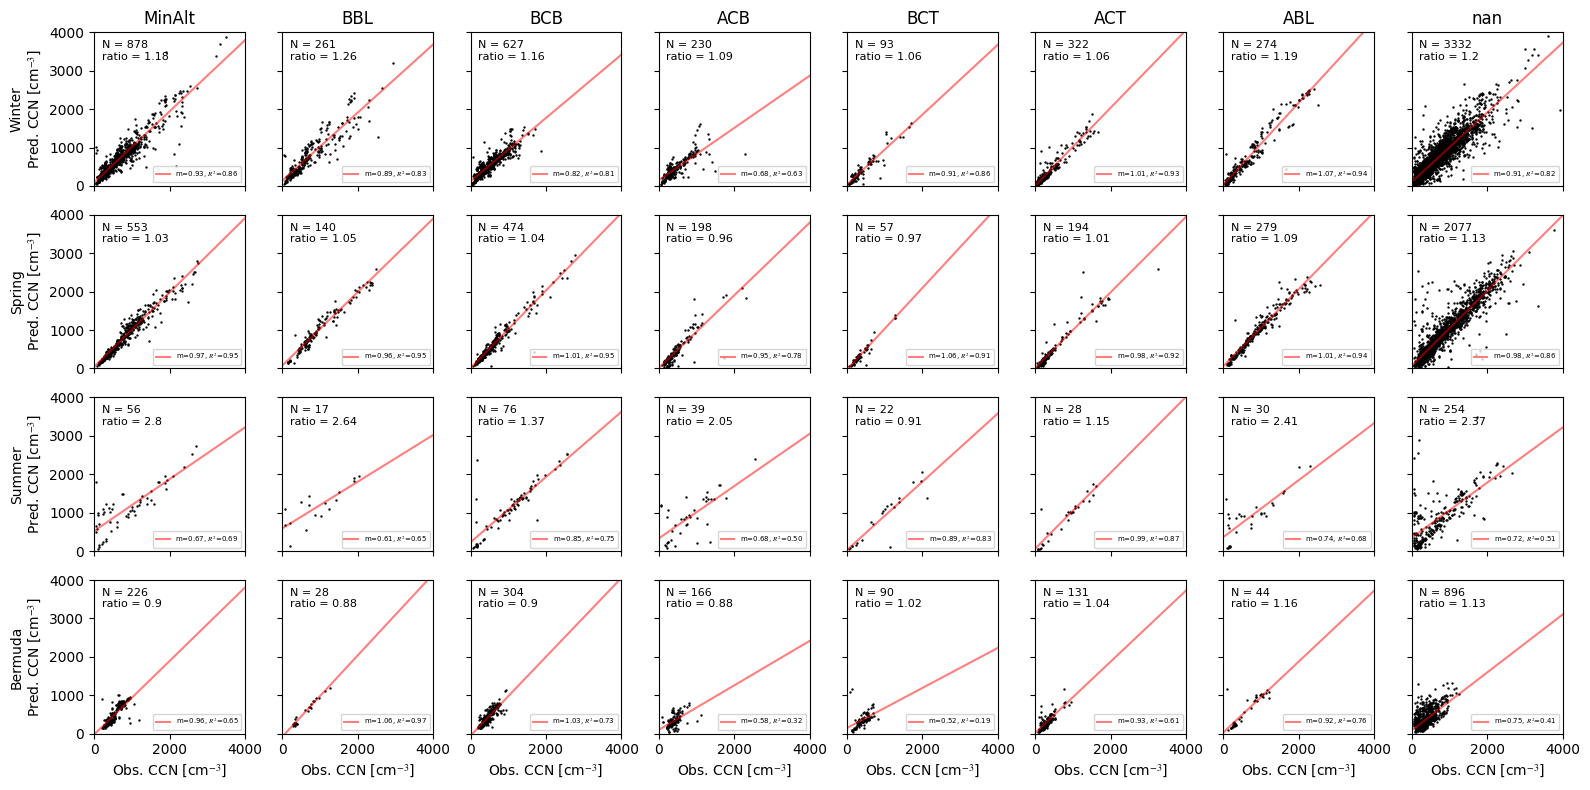

In [117]:
fig,axes = plt.subplots(4,8,figsize=(16, 8),sharex='all', sharey='all')
save_k = ['MinAlt','BBL','BCB','ACB','BCT', 'ACT','ABL',np.nan]

ax_min,ax_max = [0,4000]
j = 0 # range 0 - 7
k = 0 # range 0 - 4
for i, ax in enumerate(axes.flatten()):
    d_i = d_seg[k].loc[d_seg[k]['leg']==save_k[j]]
    if pd.isna(save_k[j]):
        d_i = d_seg[k].loc[pd.isna(d_seg[k]['leg'])]

    d_i = d_i.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
    ax.scatter(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'], s=0.5, c='black')

    
    slope, intercept, r_value, p_value, std_err = linregress(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'])
    # Calculate the line of best fit
    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
    ax.legend(fontsize=5, loc='lower right')
    mask = ~np.isnan(d_i['N_CCN_stdPT']) & ~np.isnan(d_i['CCN_n_pred'])
    num_points = np.sum(mask)
    ax.text(0.05, 0.95, f"N = {num_points}\nratio = {round((d_i['CCN_n_pred']/d_i['N_CCN_stdPT']).mean(),2)}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')



    # conditions of which leg/df to select
    j+=1
    if j == 8:
        j = 0
        k += 1

axes[0,0].set_xlim([0,4000])
axes[0,0].set_ylim([0,4000])

season = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    axes[i,0].set_ylabel(season[i]+'\nPred. CCN [cm$^{-3}$]')
for i in range(0,8):
    axes[3,i].set_xlabel('Obs. CCN [cm$^{-3}$]')
for i,ax in enumerate(axes[0,:]):
    ax.set_title(str(save_k[i]))
    
plt.tight_layout()
plt.savefig('../figures/season_legs.png', dpi=300)

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_17300/2543255286.py:20: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label='m='+f'{slope:.2f}\n' + 'R$^\mathsf{2}$=' + f'{r_value**2:.2f}', alpha=.5)


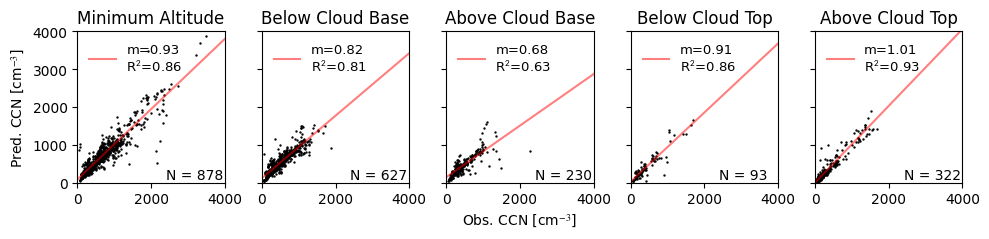

In [118]:
fig,axes = plt.subplots(1,5,figsize=(10, 2.5),sharex='all', sharey='all')
save_k = ['MinAlt','BCB','ACB','BCT', 'ACT']
save_k_l = ['Minimum Altitude','Below Cloud Base','Above Cloud Base','Below Cloud Top', 'Above Cloud Top']

ax_min,ax_max = [0,4000]
j = 0 # range 0 - 7
k = 0 # range 0 - 4
for i, ax in enumerate(axes.flatten()):
    d_i = d_seg[k].loc[d_seg[k]['leg']==save_k[j]]
    if pd.isna(save_k[j]):
        d_i = d_seg[k].loc[pd.isna(d_seg[k]['leg'])]

    d_i = d_i.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
    ax.scatter(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'], s=0.5, c='black')

    
    slope, intercept, r_value, p_value, std_err = linregress(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'])
    # Calculate the line of best fit
    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label='m='+f'{slope:.2f}\n' + 'R$^\mathsf{2}$=' + f'{r_value**2:.2f}', alpha=.5)
    ax.legend(fontsize=9.5, loc='upper left', frameon=False)
    mask = ~np.isnan(d_i['N_CCN_stdPT']) & ~np.isnan(d_i['CCN_n_pred'])
    num_points = np.sum(mask)
    ax.text(0.6, 0.1, f"N = {num_points}",
         fontsize=10, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')



    # conditions of which leg/df to select
    j+=1
    if j == 8:
        j = 0
        k += 1

axes[0].set_xlim([0,4000])
axes[0].set_ylim([0,4000])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
axes[2].set_xlabel('Obs. CCN [cm$^{-3}$]')
#fig.suptitle('Winter')
for i,ax in enumerate(axes):
    ax.set_title(str(save_k_l[i]))
'''
season = ['Winter', 'Spring', 'Summer', 'Bermuda']
for i in range(0,4):
    axes[i,0].set_ylabel(season[i]+'\nPred. CCN [cm$^{-3}$]')
for i in range(0,8):
    axes[3,i].set_xlabel('Obs. CCN [cm$^{-3}$]')
for i,ax in enumerate(axes[0,:]):
    ax.set_title(str(save_k[i]))
'''
plt.tight_layout()
plt.savefig('../figures/winter_legs.png', dpi=300, bbox_inches='tight')

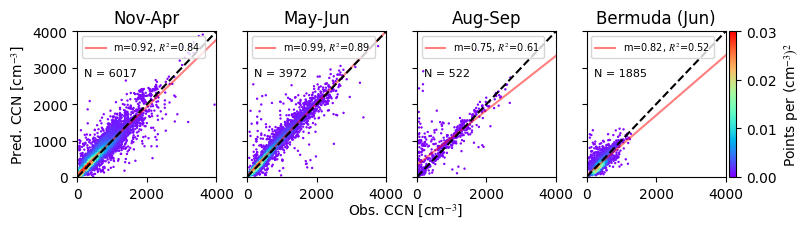

In [119]:
fig, axes = plt.subplots(1,4, figsize=(8,2), sharey=True, sharex=True, constrained_layout=True)
ax_min,ax_max = 0,4000
season2 = ['Nov-Apr', 'May-Jun', 'Aug-Sep', 'Bermuda (Jun)']
for i in range(0,4):
    ax = axes[i]
    p_d = d_seg[i].dropna(subset=['N_CCN_stdPT', 'CCN_n_pred']) # panel data


    # Calculate point density
    xy = np.vstack([p_d['N_CCN_stdPT'], p_d['CCN_n_pred']])
    z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

    slope, intercept, r_value, p_value, std_err = linregress(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'])

    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5, ls='-')
    ax.plot(np.linspace(ax_min,ax_max), np.linspace(ax_min,ax_max), c='black', alpha=1, ls='--')
    ax.legend(fontsize=7, loc='upper left')
    # plot data
    scatter = ax.scatter(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'], s=0.5, c=z, cmap='rainbow', vmin=0, vmax=0.03)

    ax.text(0.05, 0.75, f"N = {len(p_d['N_CCN_stdPT'])}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')

    # add labels
    ax.set_title(season2[i])
fig.colorbar(scatter, ax=ax, orientation='vertical', label='Points per (cm$^{-3})^2$', pad=-.1)
ax.set_xlim([ax_min,ax_max])
ax.set_ylim([ax_min,ax_max])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
fig.text(0.5, -0.05, 'Obs. CCN [cm$^{-3}$]', ha='center')
plt.savefig('../figures/seasons_all.png', dpi=300, bbox_inches='tight')

In [120]:
model = LinearRegression(fit_intercept=False)

model.fit(p_d['N_CCN_stdPT'].values.reshape(-1,1), p_d['CCN_n_pred'].values.reshape(-1,1))

LinearRegression(fit_intercept=False)

In [121]:
model.coef_

array([[0.91922756]])

In [122]:
model.score(p_d['N_CCN_stdPT'].values.reshape(-1,1), p_d['CCN_n_pred'].values.reshape(-1,1))

0.5127188510271712

In [123]:
z.max()

np.float64(0.026381074417793943)

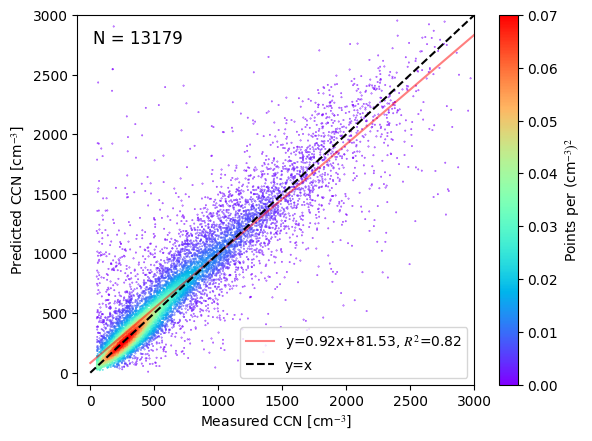

In [124]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the line of best fit
fit_line = slope * np.linspace(0, x.max()) + intercept

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

# Plot the data and best fit line
plt.plot(np.linspace(0, x.max()), fit_line, c='r', label=f'y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
plt.plot(np.linspace(0, x.max()), np.linspace(0, x.max()), c='black', ls='--', label='y=x')
plt.scatter(x, y, s=0.1, alpha=1, c=z, cmap='rainbow', vmin=0, vmax=0.07)

#plt.xlim([-100, x.max()])
#plt.ylim([-100, x.max()])
plt.xlim([-100, 3000])
plt.ylim([-100, 3000])
plt.ylabel('Predicted CCN [cm$^{-3}$]')
plt.xlabel('Measured CCN [cm$^{-3}$]')
plt.colorbar(label='Points per (cm$^{-3})^2$')

plt.text(0.15, 0.85, f"N = {num_points}",
         fontsize=12, transform=plt.gcf().transFigure,
         verticalalignment='top', horizontalalignment='left')

plt.legend(loc='lower right')
plt.savefig('../figures/closure_all_non_org_cbar.png', dpi=300, bbox_inches='tight')

In [125]:
z.max()

np.float64(0.07375391285184939)

In [126]:
def calc_density(x,y):
    # Define grid boundaries and resolution
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    bin_size = 10  # Bin size in cm^-3
    x_bins = np.arange(x_min, x_max + bin_size, bin_size)
    y_bins = np.arange(y_min, y_max + bin_size, bin_size)

    # Compute 2D histogram
    counts, x_edges, y_edges = np.histogram2d(x, y, bins=[x_bins, y_bins])

    # Calculate the area of each grid cell (cm^-3)^2
    cell_area = bin_size ** 2

    # Convert counts to points per (cm^-3)^2
    density = counts / cell_area

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_17300/2107601312.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_17300/2107601312.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LonBin'] = np.digitize(data['Longitude'], lon_bins)
/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_17300/2107601312.py:30: SettingWithCopyWarning: 
A value is trying to be set on 

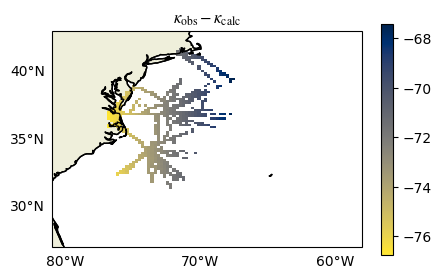

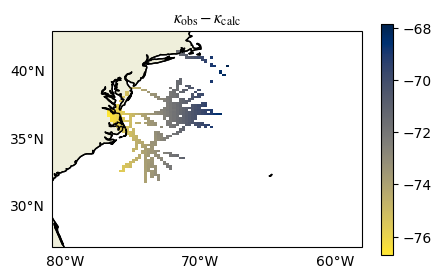

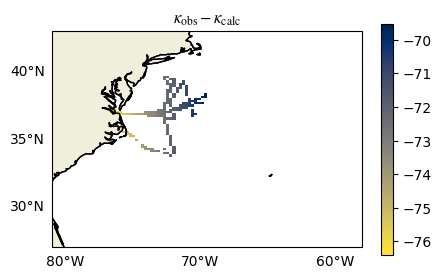

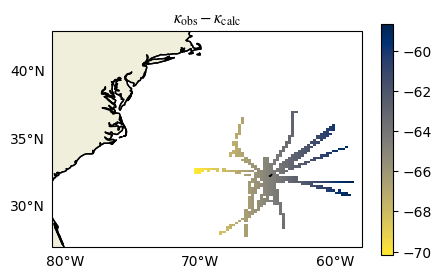

In [127]:


# Example data loading
# data = pd.read_csv('path_to_your_1hz_data.csv')  # Assuming your data is in a CSV file
# For this example, let's create some mock data

'''
np.random.seed(0)
num_points = 10000
data = pd.DataFrame({
    'Latitude': np.random.uniform(35, 50, num_points),  # Latitudes between 35 and 50
    'Longitude': np.random.uniform(-80, -50, num_points),  # Longitudes between -80 and -50
    'Time': pd.date_range(start='2023-01-01', periods=num_points, freq='H')  # 1 Hz data over a period
})
'''
for d_1 in d_seg:

    # Set up the map projection and plot area
    fig, ax = plt.subplots(figsize=(5,3), subplot_kw={'projection': ccrs.PlateCarree()})

    plt_key = ['Longitude', 'k', 'CO_ppm']
    cmap_labels = [r'$\kappa _\mathcal{obs} - \kappa _\mathcal{calc}$', r'$\kappa _\mathcal{calc}$', 'CO [ppm]']

    i=0
    data = d_1.dropna(subset=['Longitude', 'Latitude', plt_key[i]])

    # Define the grid resolution
    lat_bins = np.linspace(27, 43, 100)  # 50 bins from 35 to 50 degrees latitude
    lon_bins = np.linspace(-81, -58, 100)  # 60 bins from -80 to -50 degrees longitude

    # Bin the data into the grid
    data['LatBin'] = np.digitize(data['Latitude'], lat_bins)
    data['LonBin'] = np.digitize(data['Longitude'], lon_bins)

    # Calculate the mean time for each grid cell
    grid = data.groupby(['LatBin', 'LonBin']).agg({plt_key[i]: 'median'}).reset_index()
    #grid['k_obs'] = grid['k_obs']  # Convert time to integer for plotting

    # Create a 2D array of the grid
    time_grid = np.full((len(lat_bins), len(lon_bins)), np.nan)
    time_grid[grid['LatBin'] - 1, grid['LonBin'] - 1] = grid[plt_key[i]]


    #ax=axes[i]
    ax.set_extent([-81, -58, 27, 43], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    #ax.add_feature(cfeature.OCEAN, edgecolor='black')
    #ax.add_feature(cfeature.LAKES, edgecolor='black', alpha=0.5)
    #ax.add_feature(cfeature.RIVERS)

    # Plot the heatmap
    lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
    c = ax.pcolormesh(lon_grid, lat_grid, time_grid, cmap='cividis_r', transform=ccrs.PlateCarree())
    ax.set_title(cmap_labels[i])
    # Add a colorbar
    cbar = plt.colorbar(c, ax=ax, orientation='vertical')
    #cbar.set_label(cmap_labels[i])

    # Add grid lines
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlocator = mticker.FixedLocator([-80, -70, -60])  # Longitude labels every 5 degrees
    gl.ylocator = mticker.FixedLocator([30, 35, 40])  # Latitude labels every 5 degrees

    gl.xlines = False
    gl.ylines = False

    # Set title
    #ax.set_title('Northwest Atlantic Sampling Heatmap by Time')

    # Show the plot
    #plt.savefig('../figures/k_obs_map_diff.png', dpi=1000)

In [128]:
df_spring[df_spring['OMF']>.9]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,SMPS_Bin06,...,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k,inorg_tot,OMF,OMF_range
2616,2616,5018,8955,8955,2021-05-13 18:52:51.500,NaN,0.00,0.0,0.00,0.00,...,101.630306,113.308326,0.004,0.000876,0.000003,0.000879,0.121659,0.004,0.996748,0.9-1.0
2682,2682,5086,9062,9062,2021-05-14 13:46:26.500,NaN,0.00,0.0,0.00,0.00,...,96.258788,56.460430,0.073,0.001079,0.000052,0.001131,0.143504,0.073,0.953914,0.9-1.0
2855,2855,5263,9373,9373,2021-05-15 18:42:41.500,0.0,0.00,0.0,0.00,0.00,...,94.848386,141.483752,0.043,0.000490,0.000031,0.000521,0.150082,0.043,0.941015,0.9-1.0
3050,3050,5461,9614,9614,2021-05-18 17:58:49.500,0.0,0.00,0.0,0.00,0.00,...,98.341294,154.461370,0.031,0.000759,0.000022,0.000781,0.134465,0.031,0.971638,0.9-1.0
3491,3491,5902,10153,10153,2021-05-20 17:36:43.500,0.0,0.00,0.0,0.00,0.00,...,93.893048,159.746280,0.121,0.001181,0.000086,0.001268,0.154766,0.121,0.931831,0.9-1.0
4267,4267,6692,11392,11392,2021-06-02 18:34:15.500,NaN,0.00,0.0,0.00,0.00,...,93.563185,83.236417,0.058,0.000539,0.000041,0.000580,0.156429,0.058,0.928571,0.9-1.0
4556,4556,6984,11820,11820,2021-06-07 18:22:31.500,NaN,0.00,0.0,0.00,0.00,...,94.752066,150.444930,0.102,0.001144,0.000073,0.001216,0.150546,0.102,0.940106,0.9-1.0
4557,4557,6985,11821,11821,2021-06-07 18:23:31.500,NaN,0.00,0.0,0.00,0.00,...,91.737561,64.472611,0.211,0.001518,0.000151,0.001669,0.166066,0.211,0.909675,0.9-1.0
4560,4560,6988,11824,11824,2021-06-07 18:26:31.500,NaN,0.00,0.0,0.00,2140.57,...,91.335637,117.675773,0.091,0.000621,0.000065,0.000686,0.168293,0.091,0.905307,0.9-1.0
4603,4603,7031,11878,11878,2021-06-07 19:36:30.500,NaN,0.00,0.0,1662.53,0.00,...,101.419759,111.234795,0.005,0.000746,0.000004,0.000750,0.122429,0.005,0.995238,0.9-1.0


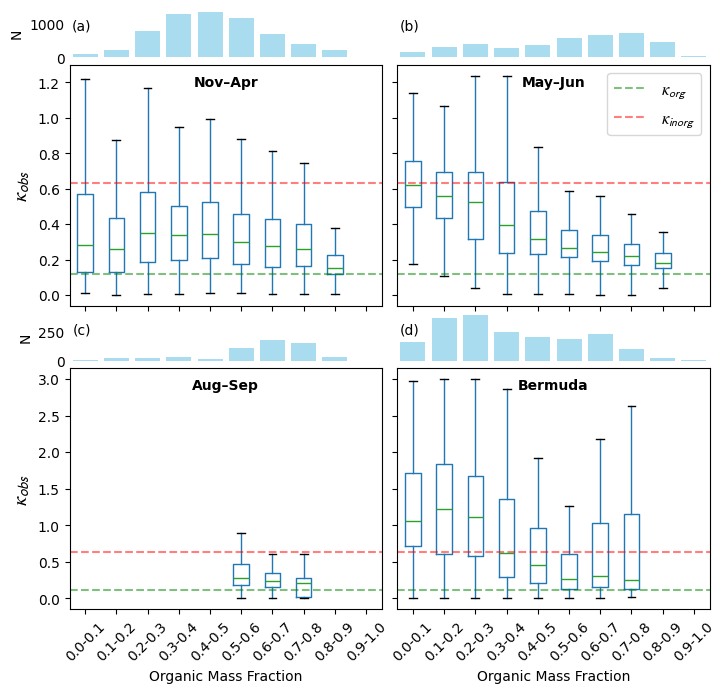

In [129]:
# Define the OMF bins and labels
mpl.rcParams['mathtext.fontset'] = 'stix'
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
labels = ['0.0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1.0']
season2 = ['Nov–Apr', 'May–Jun', 'Aug–Sep', 'Bermuda']
# Create figure and gridspec layout for distribution on top and boxplot below
fig, axes = plt.subplots(4, 2, figsize=(8,8), gridspec_kw={'height_ratios': [1, 5, 1, 5]}, sharex='all', sharey='row')
j = 0
k = 0
for i in range(0,4):
    if i == 1:
        j,k = 0,1
    if i == 2:
        j,k = 2,0
    if i == 3:
        j,k = 2,1

    d_sub = d_seg[i].copy()

    # Bin 'OMF' values
    d_sub['OMF_range'] = pd.cut(d_sub['OMF'], bins=bins, labels=labels, right=False)


    # Count the number of points in each 'OMF_range' bin
    counts = d_sub['OMF_range'].value_counts().reindex(labels).fillna(0)  # Ensure the correct order and fill missing bins with 0

    for l in range(0,len(counts)):
        if counts.iloc[l]< 75:
            d_sub.loc[d_sub['OMF_range']==counts.index[l],'k_obs'] = np.nan

    # Plot the counts as a bar chart on the top subplot
    #axes[j,k].set_title(season[i])
    axes[j,k].bar(np.linspace(1,10,10), counts.values, color='skyblue', alpha=0.7)
    
    axes[j,k].grid(True, axis='y')

    # Plot boxplot of 'k_obs' for each OMF_range on the bottom subplot
    d_sub.boxplot(column='k_obs', by='OMF_range', grid=False, showfliers=False, ax=axes[j+1,k])
    axes[j+1,k].axhline(.12, color='green', linestyle='--', alpha=0.5, label=r'$\kappa _\mathsf{org}$')
    axes[j+1,k].axhline(.63, color='red', linestyle='--', alpha=0.5, label=r'$\kappa _\mathsf{inorg}$')
    axes[j+1,k].text(0.5, .9, season2[i], transform=axes[j+1,k].transAxes, ha='center', va='bottom', fontweight='bold')
    axes[j+1,k].set_xlabel('')
    if k ==0:
        axes[j,k].set_ylabel('N')
        axes[j+1,k].set_ylabel(r'$\kappa _\mathsf{obs}$', fontsize=15)
    
    plt.subplots_adjust(hspace=.05)
    plt.subplots_adjust(wspace=.05)
    # Adjust plot and save
    plt.suptitle('')  # Remove automatic title
    axes[j+1,k].set_title('')
    #axes[1,0].set_yticks([0,.25,.5,.75,1,1.25,1.5])
    for spine in axes[j,k].spines.values():
        spine.set_visible(False)
    axes[j,k].grid(False)
    axes[j,k].tick_params(axis='both', which='both', length=0)

axes[1,1].legend(fontsize=12)
axes[3,0].set_xlabel('Organic Mass Fraction')
axes[3,1].set_xlabel('Organic Mass Fraction')
axes[3, 0].set_xticks(np.arange(1, 11))
axes[3,0].set_xticklabels(labels, rotation=45)
axes[3, 1].set_xticks(np.arange(1, 11))
axes[3,1].set_xticklabels(labels, rotation=45)
#plt.tight_layout()
panel_labels = ['(a)', '(b)', '', '', '(c)', '(d)', '','']
for ax, label in zip(axes.flat, panel_labels):
    ax.text(0.07, .8, label, transform=ax.transAxes, va='top', ha='right')
plt.savefig('../figures/k_obs_v_OMF_with_distribution_season.png', dpi=300, bbox_inches='tight')
plt.show()

In [183]:
SO4 = []
NO3 = []
NH4 = []
Chl = []
CO = []
for i in range(0,4):
    if i != 2:
        d_lomf = d_seg[i][d_seg[i]['OMF']<.3]
        SO4.append((d_lomf['SO4_Ave_IsoK_STP']/d_lomf['inorg_tot']).mean())
        NO3.append((d_lomf['NO3_Ave_IsoK_STP']/d_lomf['inorg_tot']).mean())
        NH4.append((d_lomf['NH4_Ave_IsoK_STP']/d_lomf['inorg_tot']).mean())
        Chl.append((d_lomf['Chl_Ave_IsoK_STP']/d_lomf['inorg_tot']).mean())
        CO.append(d_lomf['CO_ppm'])

In [184]:
CO = pd.concat(CO, axis=1)

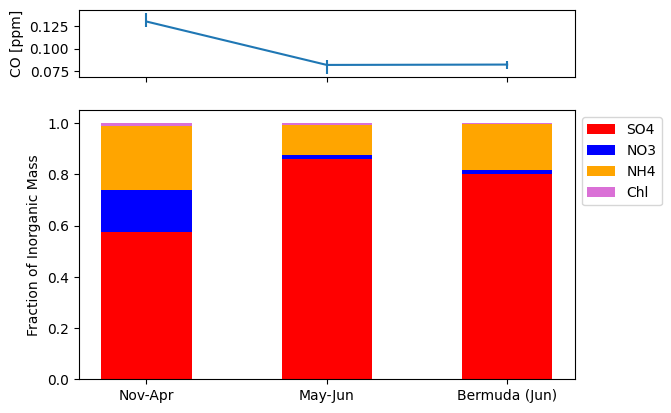

In [185]:
season = (
    "Nov-Apr",
    "May-Jun",
    "Bermuda (Jun)",
)
weight_counts = {
    "SO4": SO4,
    "NO3": NO3,
    "NH4": NH4,
    "Chl": Chl,
}
width = 0.5  # Width of the bars
colors = ['red', 'blue', 'orange', 'orchid']  # Colors for each category

# Create the figure and axis
fig, axes = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': [1, 4]})
bottom = np.zeros(len(season))  # Initialize the bottom values for stacking

axes[0].errorbar(season, CO.median(), yerr=[CO.median()-CO.quantile(.25),CO.quantile(.75)-CO.median()])
axes[0].set_ylabel('CO [ppm]')
ax = axes[1]
# Plot each category as a stacked bar
for (boolean, weight_count), color in zip(weight_counts.items(), colors):
    p = ax.bar(season, weight_count, width, label=boolean, bottom=bottom, color=color)
    bottom += np.array(weight_count)  # Update the bottom for the next stack

# Add a legend outside the plot
ax.set_ylabel('Fraction of Inorganic Mass')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Display the plot
plt.savefig('../figures/CO_v_inorg_frac.png', dpi=300, bbox_inches='tight')

In [179]:
#mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcdefaults()

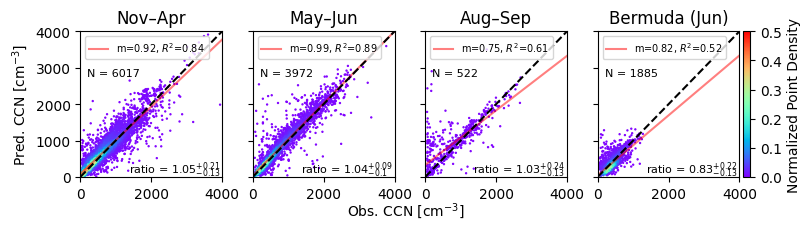

In [52]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

z_max = z.max()

fig, axes = plt.subplots(1,4, figsize=(8,2), sharey=True, sharex=True, constrained_layout=True)
ax_min,ax_max = 0,4000
season2 = ['Nov–Apr', 'May–Jun', 'Aug–Sep', 'Bermuda (Jun)']
for i in range(0,4):
    ax = axes[i]
    p_d = d_seg[i].dropna(subset=['N_CCN_stdPT', 'CCN_n_pred']) # panel data


    # Calculate point density
    xy = np.vstack([p_d['N_CCN_stdPT'], p_d['CCN_n_pred']])
    z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

    slope, intercept, r_value, p_value, std_err = linregress(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'])

    fit_line = slope * np.linspace(ax_min,ax_max) + intercept
    ax.plot(np.linspace(ax_min,ax_max), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5, ls='-')
    ax.plot(np.linspace(ax_min,ax_max), np.linspace(ax_min,ax_max), c='black', alpha=1, ls='--')
    ax.legend(fontsize=7, loc='upper left')
    # plot data
    scatter = ax.scatter(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'], s=0.5, c=z/z_max, cmap='rainbow', vmin=0, vmax=.5)

    ratio = p_d['CCN_n_pred']/p_d['N_CCN_stdPT']

    lower = round(ratio.quantile(.25) - ratio.median(),2)
    upper = round(ratio.quantile(.75) - ratio.median(),2)

    ax.text(0.05, 0.75, f"N = {len(p_d['N_CCN_stdPT'])}",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='left')
    ax.text(0.99, 0.12, f"ratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
         fontsize=8, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='right')

    # add labels
    ax.set_title(season2[i])
fig.colorbar(scatter, ax=ax, orientation='vertical', label='Normalized Point Density', pad=-.1)
ax.set_xlim([ax_min,ax_max])
ax.set_ylim([ax_min,ax_max])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
fig.text(0.5, -0.05, 'Obs. CCN [cm$^{-3}$]', ha='center')
plt.savefig('../figures/seasons_all2.png', dpi=300, bbox_inches='tight')

np.float64(0.07375391285184939)

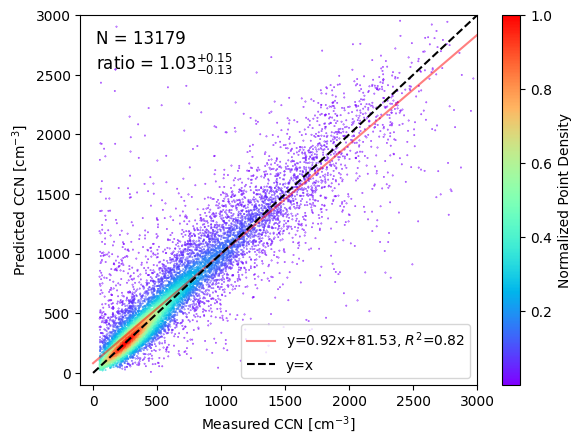

In [40]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the line of best fit
fit_line = slope * np.linspace(0, x.max()) + intercept

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

# Plot the data and best fit line
plt.plot(np.linspace(0, x.max()), fit_line, c='r', label=f'y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
plt.plot(np.linspace(0, x.max()), np.linspace(0, x.max()), c='black', ls='--', label='y=x')
plt.scatter(x, y, s=0.1, alpha=1, c=z/z_max, cmap='rainbow')#, vmin=0, vmax=0.07)

#plt.xlim([-100, x.max()])
#plt.ylim([-100, x.max()])
plt.xlim([-100, 3000])
plt.ylim([-100, 3000])
plt.ylabel('Predicted CCN [cm$^{-3}$]')
plt.xlabel('Measured CCN [cm$^{-3}$]')
plt.colorbar(label='Normalized Point Density')

ratio = sub_m2['CCN_n_pred']/sub_m2['N_CCN_stdPT']

lower = round(ratio.quantile(.25) - ratio.median(),2)
upper = round(ratio.quantile(.75) - ratio.median(),2)

plt.text(0.15, 0.85, f"N = {num_points}\nratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
         fontsize=12, transform=plt.gcf().transFigure,
         verticalalignment='top', horizontalalignment='left')

plt.legend(loc='lower right')
plt.savefig('../figures/closure_all_non_org_cbar2.png', dpi=300, bbox_inches='tight')
z.max()

np.float64(0.07375391285184939)

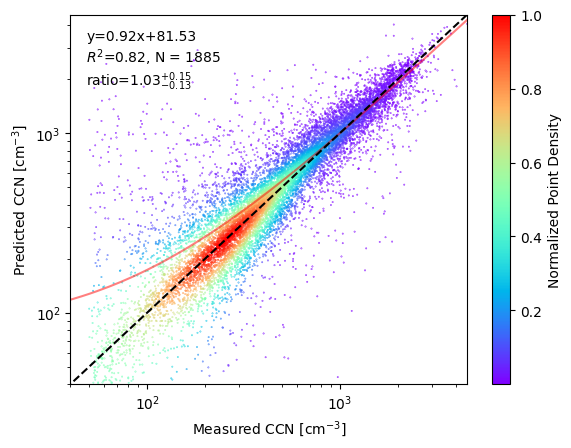

In [41]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the line of best fit
fit_line = slope * np.linspace(0, x.max(), num=1000) + intercept

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

# Plot the data and best fit line
plt.plot(np.linspace(0, x.max(), num=1000), fit_line, c='r', label=f'y={slope:.2f}x+{intercept:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
plt.plot(np.linspace(0, x.max()), np.linspace(0, x.max()), c='black', ls='--', label='y=x')
plt.scatter(x, y, s=0.1, alpha=1, c=z/z_max, cmap='rainbow')#, vmin=0, vmax=0.07)

#plt.xlim([-100, x.max()])
#plt.ylim([-100, x.max()])
plt.xlim([40, x.max()])
plt.ylim([40, x.max()])
plt.ylabel('Predicted CCN [cm$^{-3}$]')
plt.xlabel('Measured CCN [cm$^{-3}$]')
plt.colorbar(label='Normalized Point Density')

ratio = sub_m2['CCN_n_pred']/sub_m2['N_CCN_stdPT']

lower = round(ratio.quantile(.25) - ratio.median(),2)
upper = round(ratio.quantile(.75) - ratio.median(),2)

plt.text(0.15, 0.85, f"y={slope:.2f}x+{intercept:.2f}\n$R^2$={r_value**2:.2f}, N = {len(p_d['N_CCN_stdPT'])}\nratio={round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$", transform=plt.gcf().transFigure,
          verticalalignment='top', horizontalalignment='left')
'''
plt.text(0.15, 0.85, f"N = {num_points}\nratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
         fontsize=12, transform=plt.gcf().transFigure,
         verticalalignment='top', horizontalalignment='left')
'''
#plt.legend(loc='lower right')
plt.xscale('log')
plt.yscale('log')
plt.savefig('../figures/closure_all_non_org_cbar2.png', dpi=300, bbox_inches='tight')
z.max()

np.float64(0.07375391285184939)

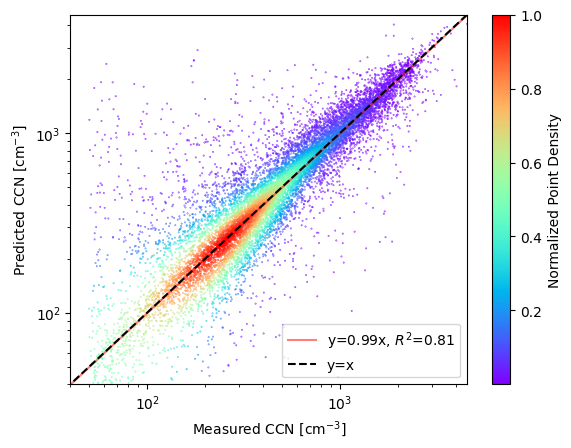

In [42]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
slope = model.coef_[0][0]
r_value = model.score(x.values.reshape(-1,1), y.values.reshape(-1,1))

# Perform linear regression
#slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the line of best fit
fit_line = slope * np.linspace(0, x.max())

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

# Plot the data and best fit line
plt.plot(np.linspace(0, x.max()), fit_line, c='r', label=f'y={slope:.2f}x, $R^2$={r_value:.2f}', alpha=.5)
plt.plot(np.linspace(0, x.max()), np.linspace(0, x.max()), c='black', ls='--', label='y=x')
plt.scatter(x, y, s=0.1, alpha=1, c=z/z_max, cmap='rainbow')#, vmin=0, vmax=0.07)

plt.xlim([40, x.max()])
plt.ylim([40, x.max()])
#plt.xlim([-100, 3000])
#plt.ylim([-100, 3000])
plt.ylabel('Predicted CCN [cm$^{-3}$]')
plt.xlabel('Measured CCN [cm$^{-3}$]')
plt.colorbar(label='Normalized Point Density')

'''
ratio = sub_m2['CCN_n_pred']/sub_m2['N_CCN_stdPT']

lower = round(ratio.quantile(.25) - ratio.median(),2)
upper = round(ratio.quantile(.75) - ratio.median(),2)

plt.text(0.15, 0.85, f"N = {num_points}\nratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
         fontsize=12, transform=plt.gcf().transFigure,
         verticalalignment='top', horizontalalignment='left')
'''

#plt.text(0.15, 0.85, f'y={slope:.2f}x, $R^2$={r_value:.2f}', fontsize=12, transform=plt.gcf().transFigure, verticalalignment='top', horizontalalignment='left')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right')
plt.savefig('../figures/closure_all_non_org_cbar3.png', dpi=300, bbox_inches='tight')
z.max()

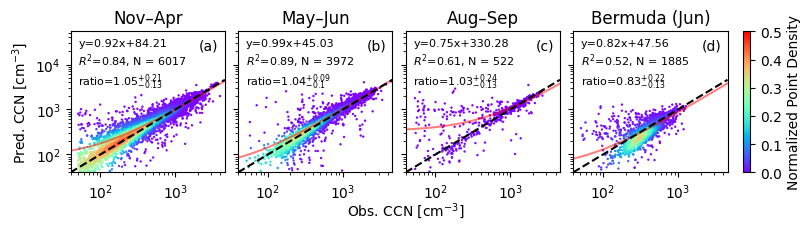

In [43]:
sub_m2 = d.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])
# Define the data
x = sub_m2['N_CCN_stdPT']
y = sub_m2['CCN_n_pred']
mask = ~np.isnan(x) & ~np.isnan(y)
num_points = np.sum(mask)

# Calculate point density
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

z_max = z.max()

fig, axes = plt.subplots(1,4, figsize=(8,2), sharey=True, sharex=True, constrained_layout=True)
ax_min,ax_max = 40,sub_m2['CCN_n_pred'].max()
season2 = ['Nov–Apr', 'May–Jun', 'Aug–Sep', 'Bermuda (Jun)']
for i in range(0,4):
     ax = axes[i]
     p_d = d_seg[i].dropna(subset=['N_CCN_stdPT', 'CCN_n_pred']) # panel data

     x,y = p_d['N_CCN_stdPT'], p_d['CCN_n_pred']


     # Calculate point density
     xy = np.vstack([x,y])
     z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point

     slope, intercept, r_value, p_value, std_err = linregress(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'])

     '''
     model = LinearRegression(fit_intercept=True)
     model.fit(x.values.reshape(-1,1), y.values.reshape(-1,1))
     slope = model.coef_[0][0]
     r_value = model.score(x.values.reshape(-1,1), y.values.reshape(-1,1))
     '''

     fit_line = slope * np.linspace(ax_min,ax_max, num=1000) + intercept
     ax.plot(np.linspace(ax_min,ax_max, num=1000), fit_line, c='r', label=f'{slope:.2f}x+{intercept:.2f} , $R^2$={r_value**2:.2f}', alpha=.5, ls='-')
     ax.plot(np.linspace(ax_min,ax_max), np.linspace(ax_min,ax_max), c='black', alpha=1, ls='--')
     #ax.legend(fontsize=7, loc='upper left')
     # plot data
     scatter = ax.scatter(p_d['N_CCN_stdPT'], p_d['CCN_n_pred'], s=0.5, c=z/z_max, cmap='rainbow', vmin=0, vmax=.5)

     ratio = p_d['CCN_n_pred']/p_d['N_CCN_stdPT']

     lower = round(ratio.quantile(.25) - ratio.median(),2)
     upper = round(ratio.quantile(.75) - ratio.median(),2)

     ax.text(0.05, 0.95, f"y={slope:.2f}x+{intercept:.2f}\n$R^2$={r_value**2:.2f}, N = {len(p_d['N_CCN_stdPT'])}\nratio={round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
          fontsize=8, transform=ax.transAxes,
          verticalalignment='top', horizontalalignment='left')
     #ax.text(0.99, 0.12, f"ratio = {round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$", fontsize=8, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right')

     ax.text(0.96, 0.95, '(' + chr(97+i) + ')',
            fontsize=10, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right')
            
     # add labels
     ax.set_title(season2[i])
     ax.set_xscale('log')
     ax.set_yscale('log')
fig.colorbar(scatter, ax=ax, orientation='vertical', label='Normalized Point Density', pad=.1)
ax.set_xlim([ax_min,ax_max])
ax.set_ylim([ax_min,ax_max+50000])
axes[0].set_ylabel('Pred. CCN [cm$^{-3}$]')
fig.text(0.5, -0.05, 'Obs. CCN [cm$^{-3}$]', ha='center')
plt.savefig('../figures/seasons_all2.png', dpi=300, bbox_inches='tight')

(0.0, 3.0)

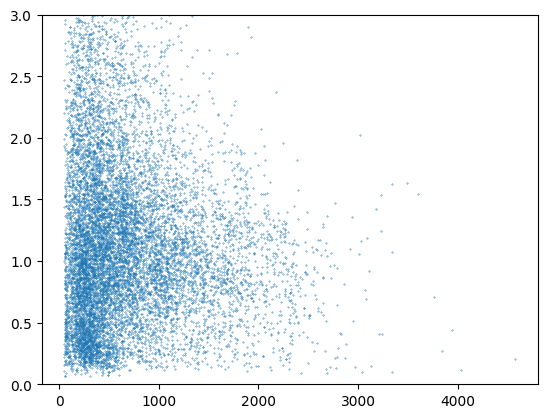

In [44]:
plt.scatter(d['N_CCN_stdPT'], d['k']/d['k_obs'], s=.1)
plt.ylim([0,3])

In [45]:
list(d.keys())

['Unnamed: 0.1',
 'level_0',
 'Unnamed: 0',
 'index',
 'Time_Mid',
 'SMPS_Bin02',
 'SMPS_Bin03',
 'SMPS_Bin04',
 'SMPS_Bin05',
 'SMPS_Bin06',
 'SMPS_Bin07',
 'SMPS_Bin08',
 'SMPS_Bin09',
 'SMPS_Bin10',
 'SMPS_Bin11',
 'SMPS_Bin12',
 'SMPS_Bin13',
 'SMPS_Bin14',
 'SMPS_Bin15',
 'SMPS_Bin16',
 'SMPS_Bin17',
 'SMPS_Bin18',
 'SMPS_Bin19',
 'SMPS_Bin20',
 'SMPS_Bin21',
 'SMPS_Bin22',
 'SMPS_Bin23',
 'SMPS_Bin24',
 'SMPS_Bin25',
 'SMPS_Bin26',
 'SMPS_Bin27',
 'SMPS_Bin28',
 'SMPS_Bin29',
 'SMPS_Bin30',
 'leg',
 'Org_Ave_IsoK_STP',
 'SO4_Ave_IsoK_STP',
 'NO3_Ave_IsoK_STP',
 'NH4_Ave_IsoK_STP',
 'Chl_Ave_IsoK_STP',
 'mz42_Ave_IsoK_STP',
 'mz43_Ave_IsoK_STP',
 'mz44_Ave_IsoK_STP',
 'mz55_Ave_IsoK_STP',
 'mz57_Ave_IsoK_STP',
 'mz58_Ave_IsoK_STP',
 'mz60_Ave_IsoK_STP',
 'mz79_Ave_IsoK_STP',
 'mz91_Ave_IsoK_STP',
 'CCN_SS',
 'N_CCN_stdPT',
 'LAS_Bin01',
 'LAS_Bin02',
 'LAS_Bin03',
 'LAS_Bin04',
 'LAS_Bin05',
 'LAS_Bin06',
 'LAS_Bin07',
 'LAS_Bin08',
 'LAS_Bin09',
 'LAS_Bin10',
 'LAS_Bin11',
 'LAS_

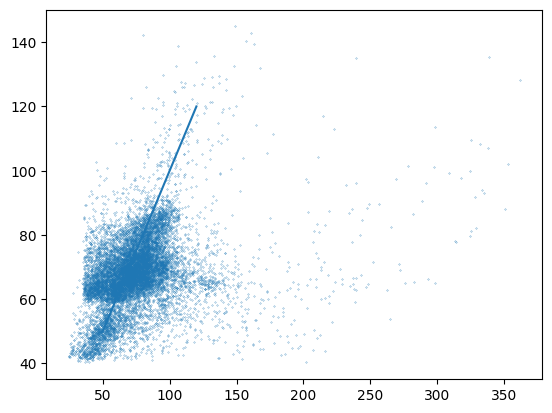

In [46]:
plt.scatter(d['D_a'], d['D_c'], s=.05)
plt.plot([50,120],[50,120])

/var/folders/tf/wjndf74j55q6hwwhxhpzl0100000gn/T/ipykernel_2137/2668701542.py:69: UserWarning: Adding colorbar to a different Figure <Figure size 800x200 with 5 Axes> than <Figure size 1600x800 with 33 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(scatter, ax=axes.ravel().tolist(), orientation='vertical', shrink=0.5, pad=0.01)


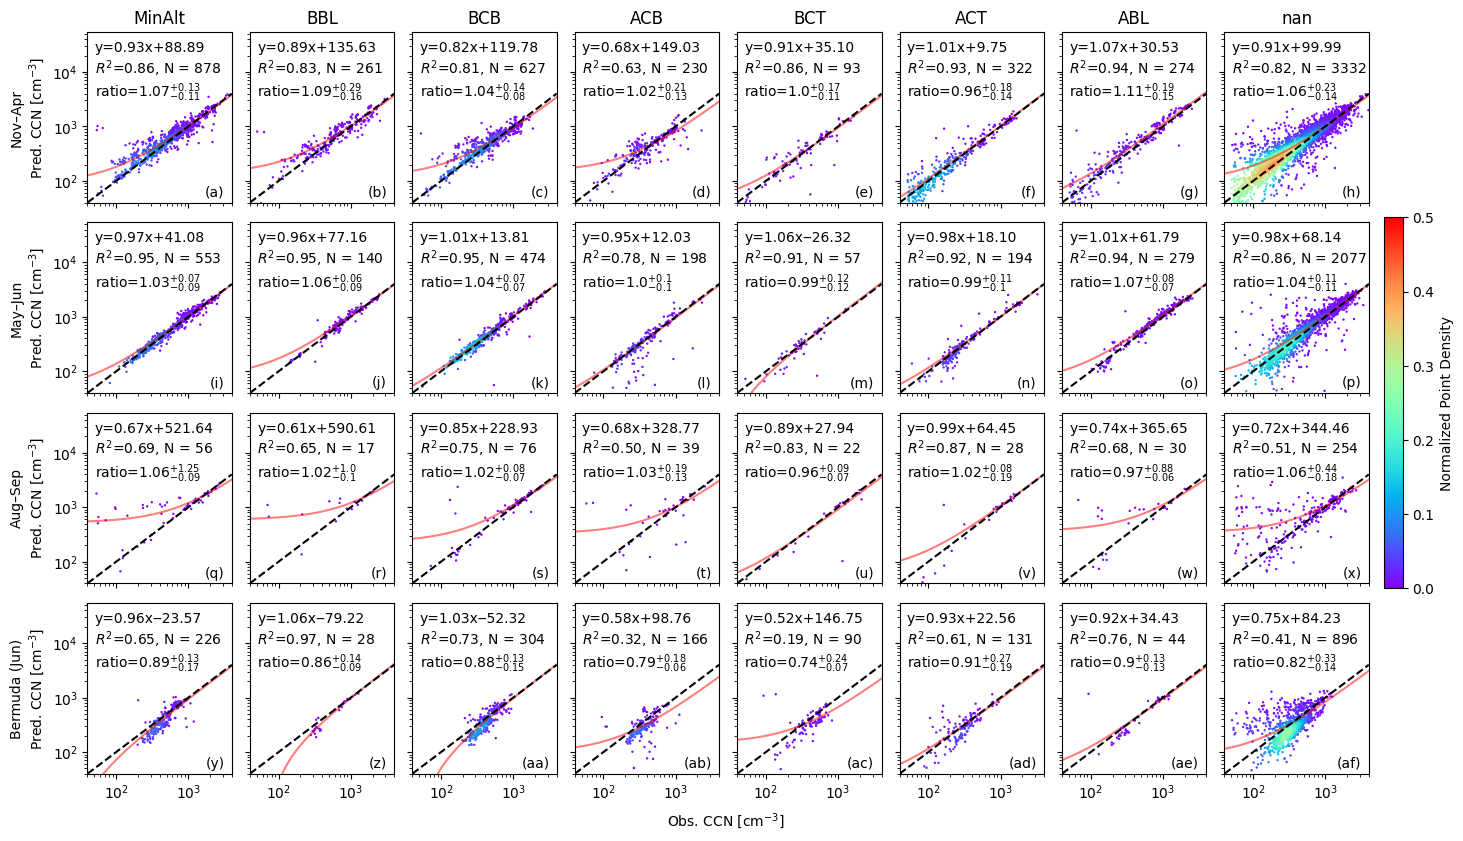

In [47]:
fig,axes = plt.subplots(4,8,figsize=(16, 8),sharex='all', sharey='all')
save_k = ['MinAlt','BBL','BCB','ACB','BCT', 'ACT','ABL',np.nan]

ax_min,ax_max = [40,4000]
j = 0 # range 0 - 7
k = 0 # range 0 - 4
for i, ax in enumerate(axes.flatten()):
    d_i = d_seg[k].loc[d_seg[k]['leg']==save_k[j]]
    if pd.isna(save_k[j]):
        d_i = d_seg[k].loc[pd.isna(d_seg[k]['leg'])]

    
    
    d_i = d_i.dropna(subset=['N_CCN_stdPT', 'CCN_n_pred'])

    x,y = d_i['N_CCN_stdPT'], d_i['CCN_n_pred']

    # Calculate point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)*len(xy.T)  # Density values for each point


    ax.scatter(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'], s=0.5, c=z/z_max , cmap='rainbow', vmin=0, vmax=.25)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(ax_min,ax_max+50000)
    ax.set_xlim(ax_min,ax_max)
    slope, intercept, r_value, p_value, std_err = linregress(d_i['N_CCN_stdPT'], d_i['CCN_n_pred'])
    # Calculate the line of best fit
    fit_line = slope * np.linspace(ax_min,ax_max, num=1000) + intercept
    ax.plot(np.linspace(ax_min,ax_max, num=1000), fit_line, c='r', label=f'm={slope:.2f}, $R^2$={r_value**2:.2f}', alpha=.5)
    ax.plot(np.linspace(ax_min,ax_max), np.linspace(ax_min,ax_max), c='black', alpha=1, ls='--')
    
    #ax.legend(fontsize=5, loc='lower right')
    mask = ~np.isnan(d_i['N_CCN_stdPT']) & ~np.isnan(d_i['CCN_n_pred'])
    num_points = np.sum(mask)
    ratio = d_i['CCN_n_pred']/d_i['N_CCN_stdPT']
    lower = round(ratio.quantile(.25) - ratio.median(),2)
    upper = round(ratio.quantile(.75) - ratio.median(),2)

    if intercept < 0:
        sign = '‒'
    else:
        sign = '+'
    ax.text(0.05, 0.95, f"y={slope:.2f}x"+sign+f"{abs(intercept):.2f}\n$R^2$={r_value**2:.2f}, N = {len(d_i['N_CCN_stdPT'])}\nratio={round(ratio.median(), 2)}$_{{{lower}}}^{{+{upper}}}$",
          fontsize=10, transform=ax.transAxes,
          verticalalignment='top', horizontalalignment='left')
    if i > 25:
        ax.text(0.95, 0.1, '(a' + chr(97+i-26) + ')',
          fontsize=10, transform=ax.transAxes,
          verticalalignment='top', horizontalalignment='right')
    else:
        ax.text(0.95, 0.1, '(' + chr(97+i) + ')',
            fontsize=10, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right')



    # conditions of which leg/df to select
    j+=1
    if j == 8:
        j = 0
        k += 1

#axes[0,0].set_xlim([0,4000])
#axes[0,0].set_ylim([0,4000])
fig.text(0.43, -0.005, 'Obs. CCN [cm$^{-3}$]', ha='center', va='center')
plt.tight_layout()
cbar = fig.colorbar(scatter, ax=axes.ravel().tolist(), orientation='vertical', shrink=0.5, pad=0.01)
cbar.set_label('Normalized Point Density')

season2 = ['Nov–Apr', 'May–Jun', 'Aug–Sep', 'Bermuda (Jun)']
for i in range(0,4):
    axes[i,0].set_ylabel(season2[i]+'\nPred. CCN [cm$^{-3}$]')
'''
for i in range(0,8):
    axes[3,i].set_xlabel('Obs. CCN [cm$^{-3}$]')
'''

for i,ax in enumerate(axes[0,:]):
    ax.set_title(str(save_k[i]))
    

plt.savefig('../figures/season_legs_log.png', bbox_inches='tight', dpi=300)